Found 12745 files belonging to 12 classes.
Using 10196 files for training.
Found 12745 files belonging to 12 classes.
Using 2549 files for validation.


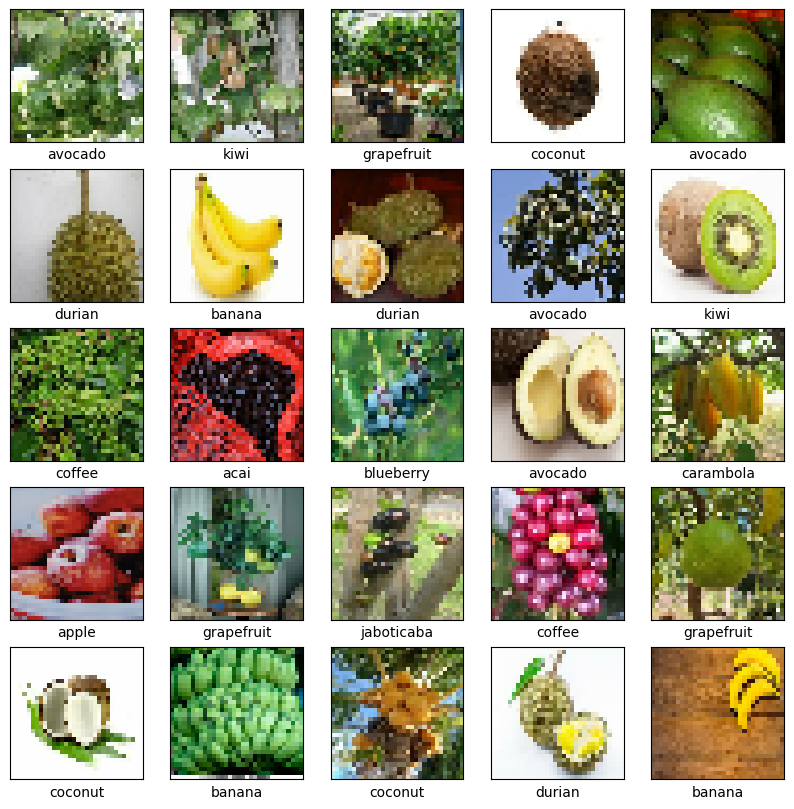

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the Fruits262 dataset
data_dir = 'archive/Fruit-262'  # Replace with the actual path to the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(32, 32),
    batch_size=128,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(32, 32),
    batch_size=128,
)

class_names = train_ds.class_names

# Visualize a few images from the dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.xlabel(class_names[labels[i]])
plt.show()



In [25]:
model = models.Sequential()

# Add a convolutional layer with 64 filters, kernel size 3x3, ReLU activation, and 'same' padding
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Add another convolutional layer with 128 filters, kernel size 3x3, ReLU activation, and 'same' padding
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output from the previous layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(class_names)))

# Print the summary of the model
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_67 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_50 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_68 (Conv2D)          (None, 32, 32, 64)        102464    
                                                                 
 batch_normalization_51 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                      

In [32]:
# Compile and train the model
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
)

Epoch 1/15


80/80 [==============================] - 68s 826ms/step - loss: 0.2290 - accuracy: 0.9234 - val_loss: 1.4737 - val_accuracy: 0.6803
Epoch 2/15
80/80 [==============================] - 64s 792ms/step - loss: 0.1317 - accuracy: 0.9560 - val_loss: 1.7343 - val_accuracy: 0.6744
Epoch 3/15
80/80 [==============================] - 65s 816ms/step - loss: 0.1154 - accuracy: 0.9617 - val_loss: 1.8285 - val_accuracy: 0.6587
Epoch 4/15
80/80 [==============================] - 64s 801ms/step - loss: 0.0968 - accuracy: 0.9682 - val_loss: 1.6579 - val_accuracy: 0.7066
Epoch 5/15
80/80 [==============================] - 64s 799ms/step - loss: 0.0792 - accuracy: 0.9738 - val_loss: 1.9679 - val_accuracy: 0.6826
Epoch 6/15
80/80 [==============================] - 65s 804ms/step - loss: 0.0907 - accuracy: 0.9699 - val_loss: 2.0078 - val_accuracy: 0.6450
Epoch 7/15
80/80 [==============================] - 72s 903ms/step - loss: 0.1133 - accuracy: 0.9635 - val_loss: 1.8144 - val_accuracy: 0.6916
Epoch 8/15

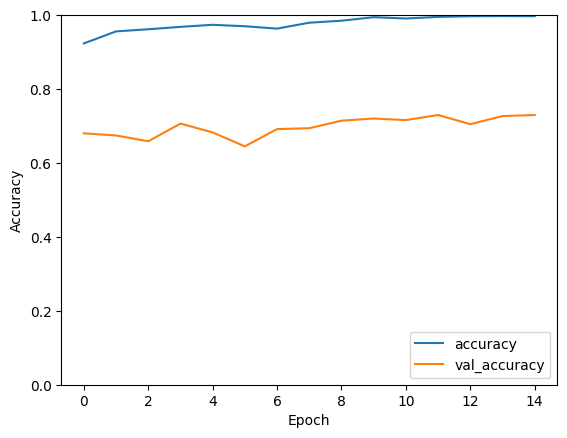

In [33]:
# Plot the accuracy and loss curves
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.legend(loc="lower right")
plt.show()

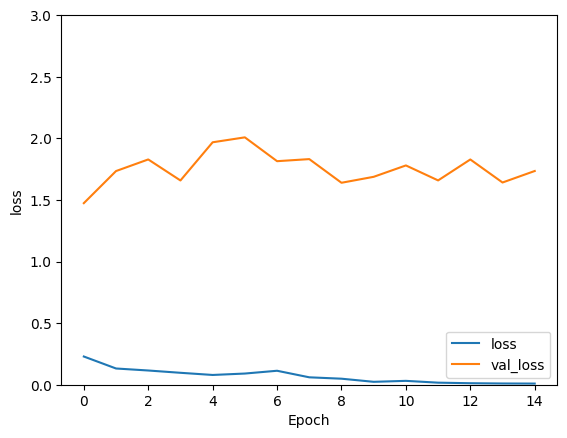

In [34]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 3])
plt.legend(loc='lower right')

In [35]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(val_ds, verbose=2)
print("Test accuracy:", test_acc)

20/20 - 4s - loss: 1.7348 - accuracy: 0.7297 - 4s/epoch - 183ms/step
Test accuracy: 0.7296979427337646


In [36]:
from pickle import dump
dump(model, open('modelo_mycnn_15_72.pkl', 'wb'))